In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve,auc

In [7]:
DEG_1 = ["IL1B", "ITGB2", "ITGAX", "COL1A1", "CSF1", "CXCL12", "SPP1", "FN1", "C3",  "MMP2"]
DEG_2 = ["MDM2", "YTHDF2", "DDX21"]
DEG_3 = ["IRF5", "DCTN5", "SLC25A46", "CORO2A", "ACADVL", "POMC", "STYXL1", "TMTC4", "POMZP3",  "VRK3"]
DEG_4 = ["SLC2A2", "SERPINF1", "RASGRP1", "CHL1"]

#### Figure 9(a)

In [41]:
train_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/train_exp.csv")
test_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/test_exp.csv")
x_train = train_exp.iloc[:,1:] 
y_train = train_exp.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)

In [42]:
kf = KFold(n_splits=3,shuffle=True,random_state=42)
svm_model = SVC(C=0.5,kernel="rbf",gamma=0.0001220703125,probability=True,random_state=42)
true_labels = []
pre_labels = []
pre_probas = []
score_cv_auc_list = []
for train_index, test_index in kf.split(x_np):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_np[train_index], x_np[test_index]
    Y_train, Y_test = y_np[train_index], y_np[test_index]
    svm_model.fit(X_train,Y_train) 
    pre_label = svm_model.predict(X_test) 
    pre_labels = np.concatenate([pre_labels,pre_label])  
    pre_proba = svm_model.predict_proba(X_test)[:,1]
    pre_probas = np.concatenate([pre_probas,pre_proba])
    true_labels = np.concatenate([true_labels,Y_test])
    score_cv_auc_list.append(roc_auc_score(Y_test,pre_proba))
    
x_test = test_exp.iloc[:,1:]
y_test = test_exp.label
roc_auc_score(y_test,svm_model.predict_proba(x_test.values)[:,1])

0.6709486166007905

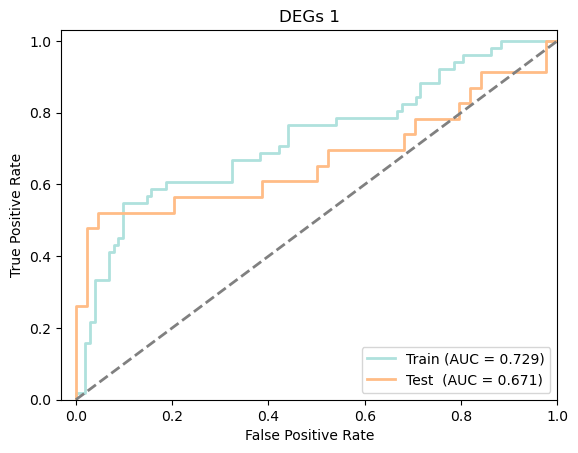

In [43]:
cv3_fpr, cv3_tpr, cv_thresholds = roc_curve(true_labels, pre_probas)
cv3_roc_auc = auc(cv3_fpr, cv3_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,  svm_model.predict_proba(x_test.values)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
lw = 2
plt.plot(cv3_fpr,cv3_tpr,color="#afe1dd",lw=lw, label='Train (AUC = %0.3f)' % cv3_roc_auc)
plt.plot(test_fpr, test_tpr,color="#ffbc86",lw=lw, label='Test  (AUC = %0.3f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("DEGs 1")

#### Figure 9(b)

In [44]:
train_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/train_exp2.csv")
test_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/test_exp2.csv")
x_train = train_exp.iloc[:,1:] 
y_train = train_exp.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)

In [45]:
kf = KFold(n_splits=3,shuffle=True,random_state=42)
svm_model = SVC(C=2048,kernel="rbf",gamma=0.03125,probability=True,random_state=42)
true_labels = []
pre_labels = []
pre_probas = []
score_cv_auc_list = []
for train_index, test_index in kf.split(x_np):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_np[train_index], x_np[test_index]
    Y_train, Y_test = y_np[train_index], y_np[test_index]
    svm_model.fit(X_train,Y_train) 
    pre_label = svm_model.predict(X_test) 
    pre_labels = np.concatenate([pre_labels,pre_label])  
    pre_proba = svm_model.predict_proba(X_test)[:,1]
    pre_probas = np.concatenate([pre_probas,pre_proba])
    true_labels = np.concatenate([true_labels,Y_test])
    score_cv_auc_list.append(roc_auc_score(Y_test,pre_proba))
    
x_test = test_exp.iloc[:,1:]
y_test = test_exp.label
roc_auc_score(y_test,svm_model.predict_proba(x_test.values)[:,1])

0.6857707509881423

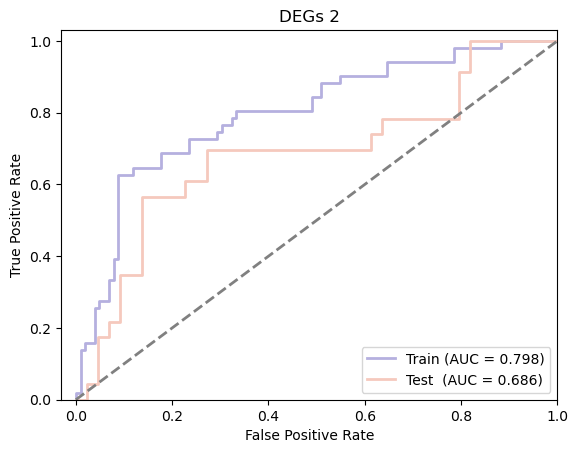

In [46]:
cv3_fpr, cv3_tpr, cv_thresholds = roc_curve(true_labels, pre_probas)
cv3_roc_auc = auc(cv3_fpr, cv3_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,  svm_model.predict_proba(x_test.values)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
lw = 2
plt.plot(cv3_fpr,cv3_tpr,color="#b5b0df",lw=lw, label='Train (AUC = %0.3f)' % cv3_roc_auc)
plt.plot(test_fpr, test_tpr,color="#f5c9bd",lw=lw, label='Test  (AUC = %0.3f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("DEGs 2")

#### Figure 9(c)

In [47]:
train_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/train_exp3.csv")
test_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/test_exp3.csv")
x_train = train_exp.iloc[:,1:] 
y_train = train_exp.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)

In [48]:
kf = KFold(n_splits=3,shuffle=True,random_state=42)
svm_model = SVC(C=128,kernel="rbf",gamma=0.0026577929690905803,probability=True,random_state=42)
true_labels = []
pre_labels = []
pre_probas = []
score_cv_auc_list = []
for train_index, test_index in kf.split(x_np):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_np[train_index], x_np[test_index]
    Y_train, Y_test = y_np[train_index], y_np[test_index]
    svm_model.fit(X_train,Y_train) 
    pre_label = svm_model.predict(X_test) 
    pre_labels = np.concatenate([pre_labels,pre_label])  
    pre_proba = svm_model.predict_proba(X_test)[:,1]
    pre_probas = np.concatenate([pre_probas,pre_proba])
    true_labels = np.concatenate([true_labels,Y_test])
    score_cv_auc_list.append(roc_auc_score(Y_test,pre_proba))
    
x_test = test_exp.iloc[:,1:]
y_test = test_exp.label
roc_auc_score(y_test,svm_model.predict_proba(x_test.values)[:,1])

0.8003952569169961

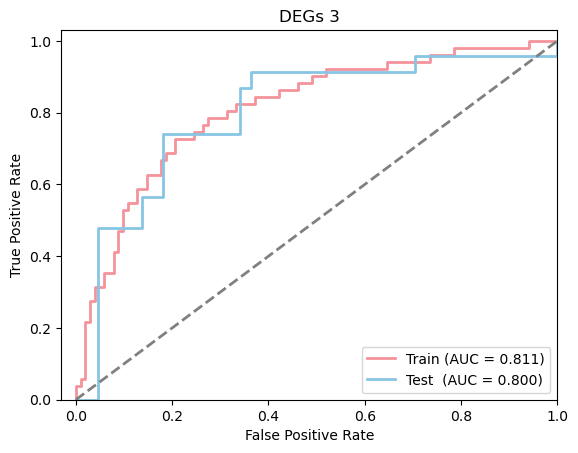

In [49]:
cv3_fpr, cv3_tpr, cv_thresholds = roc_curve(true_labels, pre_probas)
cv3_roc_auc = auc(cv3_fpr, cv3_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,  svm_model.predict_proba(x_test.values)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
lw = 2
plt.plot(cv3_fpr,cv3_tpr,color="#f5939b",lw=lw, label='Train (AUC = %0.3f)' % cv3_roc_auc)
plt.plot(test_fpr, test_tpr,color="#87c5e5",lw=lw, label='Test  (AUC = %0.3f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("DEGs 3")

#### Figure 9(d)

In [50]:
train_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/train_exp4.csv")
test_exp = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/test_exp4.csv")
x_train = train_exp.iloc[:,1:] 
y_train = train_exp.iloc[:,0] 
x_np = np.array(x_train)
y_np = np.array(y_train)

In [51]:
kf = KFold(n_splits=3,shuffle=True,random_state=42)
svm_model = SVC(C=128,kernel="rbf",gamma=0.009113508121688405,probability=True,random_state=42)
true_labels = []
pre_labels = []
pre_probas = []
score_cv_auc_list = []
for train_index, test_index in kf.split(x_np):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_np[train_index], x_np[test_index]
    Y_train, Y_test = y_np[train_index], y_np[test_index]
    svm_model.fit(X_train,Y_train) 
    pre_label = svm_model.predict(X_test) 
    pre_labels = np.concatenate([pre_labels,pre_label])  
    pre_proba = svm_model.predict_proba(X_test)[:,1]
    pre_probas = np.concatenate([pre_probas,pre_proba])
    true_labels = np.concatenate([true_labels,Y_test])
    score_cv_auc_list.append(roc_auc_score(Y_test,pre_proba))
    
x_test = test_exp.iloc[:,1:]
y_test = test_exp.label
roc_auc_score(y_test,svm_model.predict_proba(x_test.values)[:,1])

0.8162055335968379

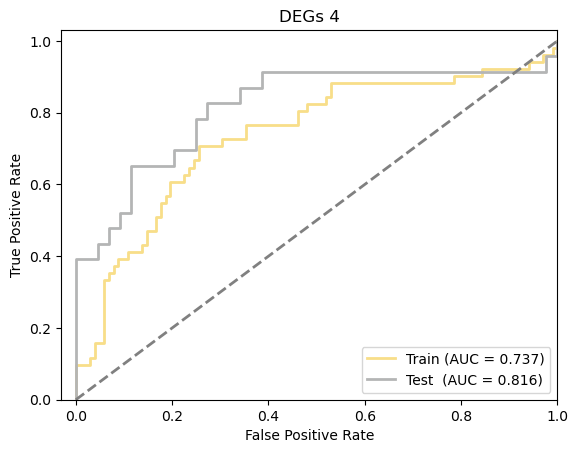

In [52]:
cv3_fpr, cv3_tpr, cv_thresholds = roc_curve(true_labels, pre_probas)
cv3_roc_auc = auc(cv3_fpr, cv3_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,  svm_model.predict_proba(x_test.values)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
lw = 2
plt.plot(cv3_fpr,cv3_tpr,color="#f8de89",lw=lw, label='Train (AUC = %0.3f)' % cv3_roc_auc)
plt.plot(test_fpr, test_tpr,color="#b4b5b5",lw=lw, label='Test  (AUC = %0.3f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("DEGs 4")